<a href="https://colab.research.google.com/github/alanGWG/Tinder-Simulator/blob/main/Tinder_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Micro II - A Teoria dos Jogos por trás do Amor: Uma Modelagem Computacional

# Integrantes
- Pedro Henrique Monteiro Werneck 
- Alan Gayger
- Diogo Sánchez
- Moisés Gonçalves 

## Modelagem Matemática
- Ideia central: aplicativos de relacionamento tem se tornado cada vez mais populares e contribuído para espalhar o amor pelo mundo. Nesse contexto, o presente trabalho busca analisar as interações entre usuários desses sistemas em um ambiente similar ao do "famoso" Tinder, porém de maneira simplificada.

# 1) Finalidade do Jogo:

  - i) Problema a ser analisado: em aplicativos como o Tinder, há uma restrição no número de likes a serem dados em outras pessoas. Nesse contexto, os usuários muitas vezes os gastam de maneira ineficiente. Assim, o problema seria: como esses agentes, do ponto de vista racional, poderiam gastar esses recursos de maneira mais eficiente? 
  - ii) Justificar Teoria dos Jogos: nesse cenário, busca-se analisar a tomada de decisão estratégica de indivíduos, que afetam os resultados das decisões de terceiros. Assim, a Teoria dos Jogos surge para jogar uma luz sobre o problema e indicar caminhos racionais para a sua resolução. 
  - iii) Finalidade do jogo: analisar as interações entre os jogadores (usuários desses aplicativos) e determinar quais as estratégias que prevalecem em relação às outras (estratégias racionais). 

#2) Definindo o Jogo:

- Jogadores: são representados pelos N usuários de um aplicativo de relacionamento, sendo que a cada um deles é atribuído um rank de 1 a 3 que define a sua desejabilidade.
- Espaço de Estratégias: o espaço de estratégias do $ \mbox{jogador i}$ é um conjunto {L, NL} (Like e Não Like) para $\forall \mbox{ jogador } j \in {1, 2, ... , N} \mbox{ com } i \neq j$.
- Payoffs: nesse contexto, a matriz de payoff de um jogador de rank x com um jogador de rank y é dado pela seguinte matriz:      

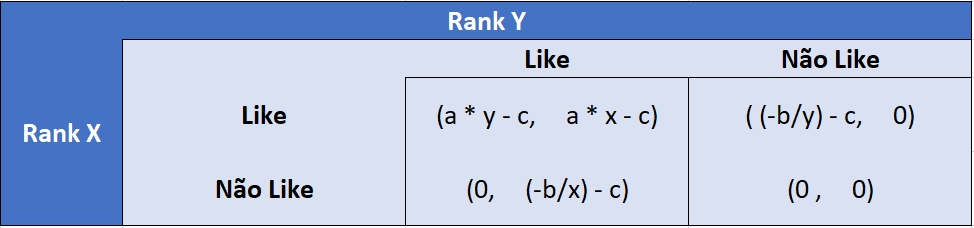

- Observando os payoffs, é possível perceber que há uma semelhança com a realidade:    
  - "c" representa o custo de um like. Assim, quando um jogador i dá like em outro jogador j, o seu payoff é subtraído do valor "c";
  - "b" representa o valor de uma rejeição, a qual ocorre quando o like de um jogador i não é correspondido. Nesse contexto, o termo "b" é dividido pelo rank do outro jogador ("x" ou "y") e é subtraído do payoff;
  - "a" representa o valor de um match, o qual ocorre quando ambos os jogadores trocam likes. Nesse contexto, o termo "a" é multiplicado pelo rank do outro jogador ("x" ou "y"), representando o maior benefício de se "dar um match" com jogadores de diferentes níveis de desejabilidade.
- O Payoff do jogador i é dado de acordo com a matriz anterior e pelas combinações L-NL realizadas nos jogos com todos os outros jogadores. Assim, o payoff de um dado perfil de estratégia pode ser encontrado generalizando-se o payoff do jogador i para todos os N jogadores.


## Classes do Trabalho

In [ ]:
# importando pacotes

import numpy as np
import random
import copy 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from google.colab import output
import pandas as pd


In [ ]:
# Define uma semente para a geração de valores aleatórios
# Garante reprodutibiliadade dos resultados (comandos amplamente utilizados em computação científica)

semente = 42
np.random.seed(semente)
random.seed(semente)

In [ ]:
class Pessoa(): #Classe pessoas
  def __init__(self, estrategia:str,rank:int,iid:str , id_escolhido={} , id_me_escolheu={}, id_rejeitei=[""],estoque=30,payoff=0,premium=False):
    """
    estrategia: string para a função escolhe() saber qual estrategia usar
    rank: rank da pessoa 
    id: id da pessoa
    id_escolhido: ids que essa pessoa deu like (dicionário com ids em forma de string e ranks das pessoas em formato inteiro)
    id_me_escolheu: ids que deu like nessa pessoa (dicionário com ids em forma de string e ranks das pessoas em formato inteiro)
    estoque: estoque de likes
    payoff: utilidade auferida por essa pessoa em uma determinada rodada
    """

    self.estrategia=estrategia #Estrategia é uma string para a função escolhe() saber qual estrategia usar
    self.rank=rank #rank dessa pessoa 
    self.iid=iid #id dessa pessoa
    self.id_escolhido=id_escolhido #id que essa pessoa deu like
    self.id_me_escolheu=id_me_escolheu #id que deu like nessa pessoa
    self.estoque=estoque #estoque de like
    self.payoff=payoff
    self.premium=premium
    self.id_rejeitei=id_rejeitei

  def conta_match(self) -> list:
    'Isso retorna uma lista [matchs rank 1  , matchs rank2 , matchs rank3 ] '
    # sets com ids de pessoas em que uma determinada pessoa deu like (divididos por rank)
    rank1_escolhido= { key for key,value in self.id_escolhido.items() if value==1 }
    rank2_escolhido= { key for key,value in self.id_escolhido.items() if value==2}
    rank3_escolhido= { key for key,value in self.id_escolhido.items() if value==3 }

    # sets com ids de pessoas que deram like em uma determinada pessoa (divididos por rank)
    rank1me_escolhido= { key for key,value in self.id_me_escolheu.items() if value==1 }
    rank2me_escolhido= { key for key,value in self.id_me_escolheu.items() if value==2}
    rank3me_escolhido= { key for key,value in self.id_me_escolheu.items() if value==3 }
    
    # determina quantos matches uma determinada pessoa deu (por rank)
    # verifica a interesecção entre rank_escolhido e rankme_escolhido, atribuindo a quantidade de elementos na interesecção a match_rank
    match_rank1= len( rank1_escolhido.intersection(rank1me_escolhido) )
    match_rank2=len( rank2_escolhido.intersection(rank2me_escolhido) )
    match_rank3=len( rank3_escolhido.intersection(rank3me_escolhido) )


    retorno = [match_rank1 , match_rank2 , match_rank3]


    a=2
    b=2
    c=1

    # calcula payoff de uma determinada pessoa
    # caso_match calcula payoff dos matches, atribuindo pesos 1, 2 e 3 para matches com pessoas de ranks 1, 2 e 3 (respectivamente)
    caso_match = sum(list(map(lambda x,y: x*y,retorno,[1,2,3]))) * (a)

    # rejeitado calcula payoff do excesso de likes distribuídos (likes que não deram match)
    # nesse caso, se uma determinada pessoa deu muitos likes e conseguiu poucos matches com pessoas de um determinado rank
    # então o valor de rejeitado diminuirá
    rejeitado=0
    rejeitado += ( len(rank1_escolhido) - match_rank1 ) * (-b/1 )
    rejeitado += ( len(rank2_escolhido) - match_rank2 ) * (-b/2 )
    rejeitado += ( len(rank3_escolhido) - match_rank3 ) * (-b/3 )
    self.payoff = rejeitado + caso_match - c* (len(rank1_escolhido)+len(rank2_escolhido)+len(rank3_escolhido))

    return retorno


  def calcula_payoff(self):
    """
    Realiza o cálculo do payoff utilizando as equações presentes em conta_match.
    """
    if self.payoff ==0:
      self.conta_match()
    return self.payoff 
    

  def set_like(self,pessoa):
    """
    Registra like de uma determinada pessoa no objeto Pessoa recebido (em pessoa.id_me_escolheu e self.id_escolhido)
    pessoa: recebe um objeto da classe Pessoa 
    """
    
    pessoa.id_me_escolheu[self.iid]=self.rank
    self.id_escolhido[pessoa.iid]=pessoa.rank
    self.estoque += -1


  def escolhe(self,lista1):
    """
    Determina e repassa likes que uma determinada pessoa dará em todas as outras.
    lista: recebe lista com todas as outras pessoas participando do jogo.
    """

    # aleatorizar a lista
    lista = [ i for i in lista1[:][:]]
    random.shuffle(lista)
    
    
    # lista_rank recebe ranks de todas as pessoas no jogo
    lista_rank= [i.rank for i in lista]


    #criar uma lista de quem te rejeitou
    me_rejeitou = []
    if self.premium:
      for person in lista:
        rejeitados=copy.deepcopy(person.id_rejeitei)
        if self.iid in rejeitados:
          me_rejeitou.append(person.iid)

    # determina qual estratégia será utilizada para realizar os likes 

    # estratégia "a" dá like em todos que tiverem rank >= minimo enquanto ainda houverem likes (estoque > 0)
    if self.estrategia=='a':
      minimo = 2
      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]>=minimo and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou: #a estrategia de fato é essa aqui
              self.set_like(lista[i])    #se a pessoa está dentro dos parametros isso aqui seta o like pro simulator
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)

    # estratégia "b" dá like em todos que tiverem rank == 1 enquanto ainda houverem likes (estoque > 0)
    if self.estrategia=='b':
      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]==1 and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)
            

    # estratégia "c" dá like em todos que tiverem rank == 2 enquanto ainda houverem likes (estoque > 0)
    if self.estrategia=='c':
      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]==2 and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)
    
    # estratégia "d" dá like em todos que tiverem rank == 3 enquanto ainda houverem likes (estoque > 0)
    if self.estrategia=='d':
      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]==3 and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)

  # estratégia "e" dá like em todos os que aparecerem enquanto houverem likes (estoque > 0) sem nenhum critério a mais.
    if self.estrategia == "e":
      for i in range(len(lista)):
        if self.estoque>0 and not lista[i].iid in me_rejeitou:
          self.set_like(lista[i])
        elif self.estoque == 0:
          break
        else:
            self.id_rejeitei.append(lista[i].iid)

  # estratégia "f" dá like apenas em pessoas do mesmo rank que ela.
    if self.estrategia == "f":
      for i in range(len(lista)):
        if self.estoque>0 and lista_rank[i]== self.rank and not lista[i].iid in me_rejeitou:
          self.set_like(lista[i])
        elif self.estoque == 0:
          break
        else:
            self.id_rejeitei.append(lista[i].iid)
  
  # estratégia "g" dá like de acordo com a posição das pessoas na lista, mantendo um intervalo constante
    if self.estrategia == "g":
      intervalo = 2
      for i in range(len(lista)):
        # o módulo da divisão da posição de uma pessoa na lista pelo intervalo garante que 
        # a estratégia g selecione pessoas de acordo com um intervalo constante
        if self.estoque>0 and i%intervalo==0 and not lista[i].iid in me_rejeitou:
          self.set_like(lista[i])
        elif self.estoque == 0:
          break 
        else:
            self.id_rejeitei.append(lista[i].iid)

  # estratégia "h" dá like buscando manter um "rank médio" nas pessoas que ela dá os likes
    if self.estrategia == "h":

      rank_medio_objetivo = 2 # rank médio que a pessoa busca manter
      rank_soma_registro = 0  # soma dos ranks de todos aqueles em quem a pessoa deu like
      rank_medio_registro = 0 # média dos ranks de todos aqueles em quem a pessoa deu like

      for i in range(len(lista)):
        if self.estoque>0 and self.iid!= lista[i].iid: 
          
          # se o rank médio está acima do objetivo, então a pessoa só dá like em outras pessoas com rank abaixo desse objetivo
          if rank_medio_registro > rank_medio_objetivo and lista_rank[i] < rank_medio_objetivo and not lista[i].iid in me_rejeitou:
            self.set_like(lista[i])
          
          # se o rank médio está abaixo do objetivo, então a pessoa só dá like em outras pessoas com rank acima desse objetivo
          elif rank_medio_registro < rank_medio_objetivo and lista_rank[i] > rank_medio_objetivo and not lista[i].iid in me_rejeitou:
            self.set_like(lista[i])
          rank_soma_registro += lista_rank[i] 
          rank_medio_registro = rank_soma_registro / (i + 1) # computa rank médio obtido até a última pessoa que recebeu o like
        
        elif self.estoque == 0:
          break
        else:
            self.id_rejeitei.append(lista[i].iid)

    # estratégia "i" dá like em todos que tiverem rank <= maximo enquanto ainda houverem likes (estoque > 0)
    if self.estrategia=='i':
      maximo = 2

      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]<=maximo and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou: 
              self.set_like(lista[i])    
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)
    
    # estratégia "j" dá like de acordo com uma probabilidade constante e de maneira uniforme entre as diferentes pessoas da lista
    if self.estrategia=='j':
      probabilidade = self.estoque / len(lista)
      for i in range(len(lista)):
        
          # retorna True se V.A. uniforme for menor que probabilidade (o que ocorre com probabilidade igual a probabilidade)  
          like_probabilidade = np.random.random() < probabilidade 

          # garante que a pessoa escolha de acordo com a probabilidade indicada
          if self.estoque>0 and like_probabilidade == True and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])    

          elif self.estoque ==0:
            break
          
          else:
            self.id_rejeitei.append(lista[i].iid)
    
    # estratégia "k" dá like em todas as pessoas e soma os ranks delas. Quando ela chega em uma soma especificada, ela para de dar like
    if self.estrategia=='k':
      soma_rank_objetivo = 50 # soma dos ranks ao qual a pessoa quer chegar
      soma_rank_registro = 0 # soma ranks de todos em quem a pessoa deu like
      
      for i in range(len(lista)):
          # verifica se a pessoa já atingiu a meta desejada para a soma dos ranks
          if self.estoque>0 and soma_rank_objetivo > soma_rank_registro and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou: 
              self.set_like(lista[i]) 
              soma_rank_registro += lista_rank[i]
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)
    
    # estratégia "l" dá like em todas as pessoas com o rank maior ou igual ao maior rank em quem ela já deu like
    if self.estrategia=='l':
      maximo_historico = 0 # registra qual o menor rank de alguém que recebeu o like da pessoa
      
      for i in range(len(lista)):
          # a pessoa só dá like em indivíduos com rank maior que o maximo_historico
          if self.estoque>0 and lista_rank[i]>=maximo_historico and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])    
              maximo_historico = lista_rank[i] # se uma pessoa tem rank maior do que o maximo_historico, então esse rank é atribuído ao maximo_historico
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)
    
    # estratégia "m" dá like em todas as pessoas com o rank menor ou igual ao menor rank em quem ela já deu like
    # funciona da mesma maneira que a estratégia anterior, mas através de um rank mínimo
    if self.estrategia=='m':
      minimo_historico = 1000
      for i in range(len(lista)):
          if self.estoque>0 and lista_rank[i]<=minimo_historico and self.iid!= lista[i].iid and not lista[i].iid in me_rejeitou:
              self.set_like(lista[i])    
              minimo_historico = lista_rank[i]
          elif self.estoque ==0:
            break
          else:
            self.id_rejeitei.append(lista[i].iid)

  



In [ ]:
class Simulador():
    def __init__(self,pessoas=[]):
      """
      Simula interação entre pessoas em aplicativos de relacionamento.
      pessoas: recebe todas as pessoas que participarão do jogo.
      """
      
      self.pessoas=pessoas
    
    def cria_pessoas(self,lista_estrategias,lista_pesos,pop,estoq=30,premium_prop=0):
      """
      Cria pessoas (jogadores) para o simulador com base nas possíveis estratégias e na proporção em que cada uma aparece na população (conjunto de todos os jogadores).
      lista_estrategias: recebe lista com todas as estratégias possíveis para cada uma das pessoas utilizarem.
      lista_pesos: recebe lista com valores inteiros que determinam as proporções em que cada estratégia aparecerá considerando-se todos os jogadores.
      pop: número total de pessoas (população).
      estoque: número de likes a que cada pessoa tem direito.
      """

      # lista_pessoas determina o número de jogadores que terá cada estratégia
      lista_pessoas = list (np.array(lista_pesos)/sum(lista_pesos) * pop)
      codigoid = -1
      estrategia=0
      for quantidade in lista_pessoas:
          for pessoa in range(int(quantidade)): # para uma dada estratégia, serão criadas "quantidade" pessoas
              codigoid+=1
              r= np.random.randint(1,4)
              p1 = Pessoa( estrategia=lista_estrategias[estrategia] , rank=r , iid=str(codigoid) , id_escolhido={} , id_me_escolheu={}, id_rejeitei=[""],estoque=estoq,payoff=0,premium=random.random()<=premium_prop )
              self.pessoas.append(  p1  )
          estrategia+=1
      random.shuffle(self.pessoas)

    def del_pessoas(self): # deletar pessoas
      self.pessoas=[]

    def rodada(self):
      """
      Realiza uma rodada de iterações entre pessoas, simulando a interação entre elas em aplicativos de relacionamento.
      """
    
      lista=self.pessoas
      for pessoa in range(len(lista)):
          self.pessoas[pessoa].escolhe(lista)
    
        
        


## Simulador de partidas
- Implementação do simulador considerando população homogênea

In [ ]:
# cria o simulador (inicializa uma instância do objeto Simulador)
simulador = Simulador()

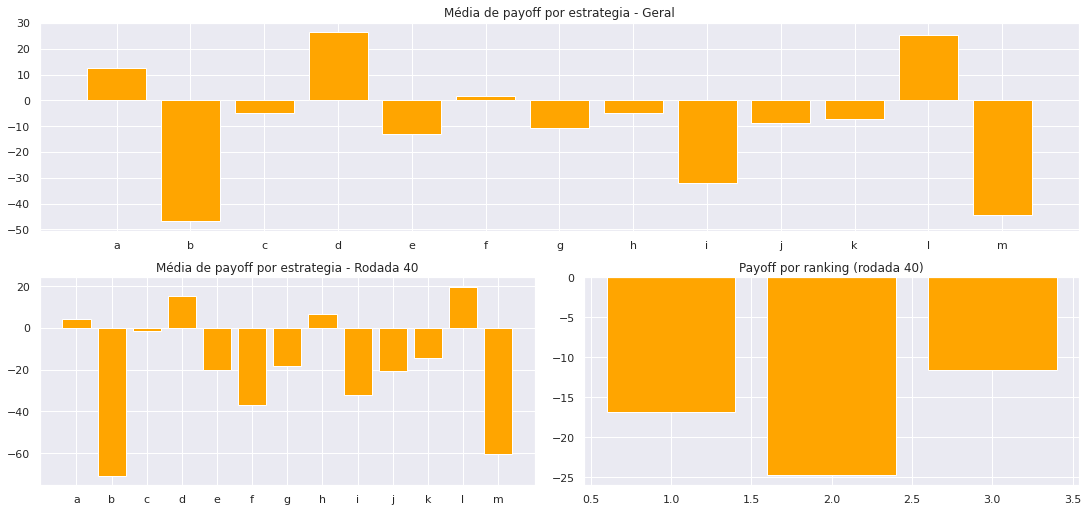

In [ ]:
# Execução do simulador
# Visualização gráfica dos resultados

# determina parâmetros a serem utilizados no simulador
lista_estrategias = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
lista_pesos = [1 for letra in lista_estrategias]
pop = 100
estoque = 40

# cria jogadores de acordo com os parâmetros
simulador.cria_pessoas(lista_estrategias, lista_pesos, pop, estoque)

#cria simulações

rodada = 0
lista_tuplas_geral=[]
ranks=[1,2,3]
while True:
  lista_pesos = [1 for letra in lista_estrategias]
  rodada +=1
  simulador.del_pessoas()
  simulador.cria_pessoas(lista_estrategias, lista_pesos, pop, estoque)
  simulador.rodada()

  populacao = simulador.pessoas
  lista_tuplas = [(pessoa.estrategia , pessoa.calcula_payoff(),pessoa.rank) for pessoa in populacao]
  lista_tuplas_geral += lista_tuplas


  ##Calculando pay off médio na rodada
  payoff_medio = []
  for estrategia in lista_estrategias:
    somador =0
    contador=0
    for pessoa in lista_tuplas:
      if pessoa[0] == estrategia:
        contador+=1
        somador+=pessoa[1]
    if contador==0:
      payoff_medio.append(0)
    else:
      payoff_medio.append(somador/contador)


  ##Calculando pay off médio geral
  payoff_medio_geral=[]
  for estrategia in lista_estrategias:
    somador =0
    contador=0
    for pessoa in lista_tuplas_geral:
      if pessoa[0] == estrategia:
        contador+=1
        somador+=pessoa[1]
    if contador ==0:
      payoff_medio_geral.append(0)
    else: 
      payoff_medio_geral.append(somador/contador)
  
  ## Calcula payoff por rank
  rank_medio=[]
  for rk in ranks:
    somador =0
    contador=0
    for pessoa in lista_tuplas:
      if pessoa[2] == rk:
        contador+=1
        somador+=pessoa[1]
    rank_medio.append(somador/contador)

  figura = plt.figure(figsize=(15,7), constrained_layout=True)
  gs = figura.add_gridspec(2, 2)

  ax = plt.subplot(gs[0, :]) # row 0, col 0
  ax.title.set_text('Média de payoff por estrategia - Geral')
  plt.bar(lista_estrategias,payoff_medio_geral,color='orange')

  ax = plt.subplot(gs[1, 0]) # row 0, col 1
  ax.title.set_text(f'Média de payoff por estrategia - Rodada {rodada}')
  plt.bar(lista_estrategias,payoff_medio,color='orange')

  ax = plt.subplot(gs[1, 1]) # row 1, span all columns
  ax.title.set_text(f'Payoff por ranking (rodada {rodada})')
  plt.bar(ranks,rank_medio,color='orange')


  output.clear(wait=True)
  plt.show()
  if rodada>=40:
    break

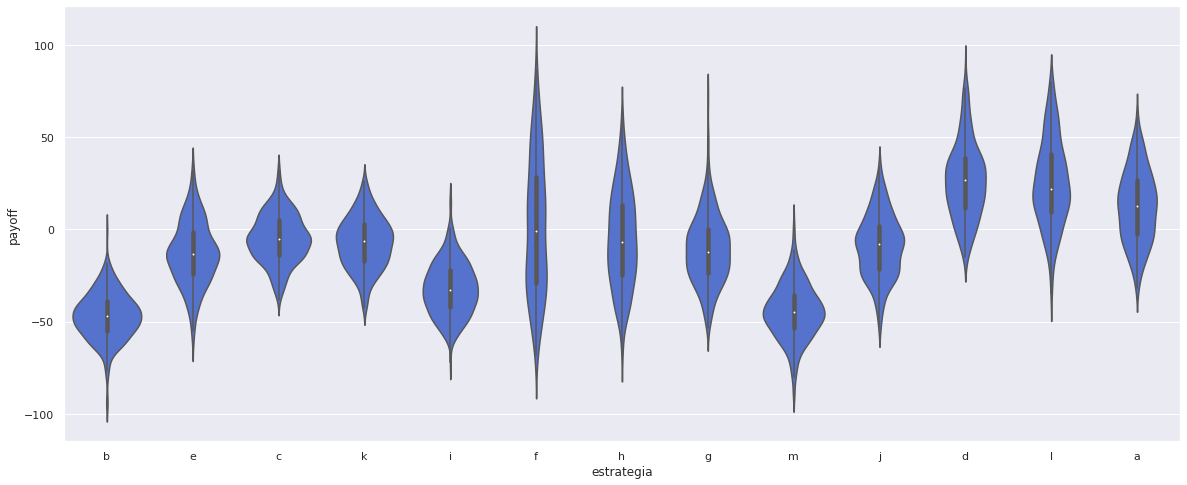

In [ ]:
df_lista = pd.DataFrame(lista_tuplas_geral)
df_lista.columns = ['estrategia', 'payoff', 'rank']
fig , ax = plt.subplots(figsize=(20,8))
sns.violinplot(x=df_lista['estrategia'], y=df_lista['payoff'],ax=ax,color='royalblue')

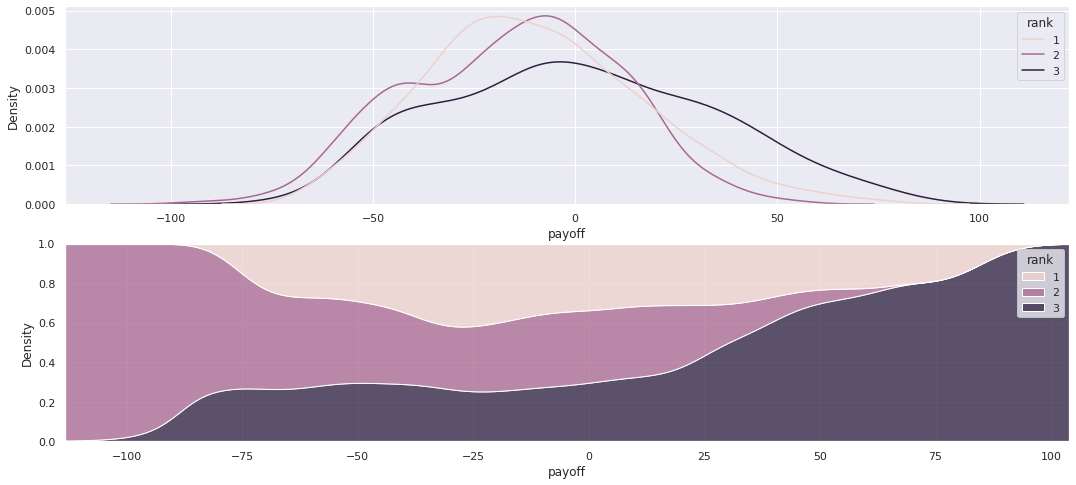

In [ ]:
fig , ax = plt.subplots(2,1,figsize=(18,8))
sns.color_palette("dark",as_cmap=True)

sns.kdeplot(data=df_lista, x="payoff",hue="rank",ax=ax[0])
sns.kdeplot(data=df_lista, x="payoff",multiple='fill',hue="rank",ax=ax[1])

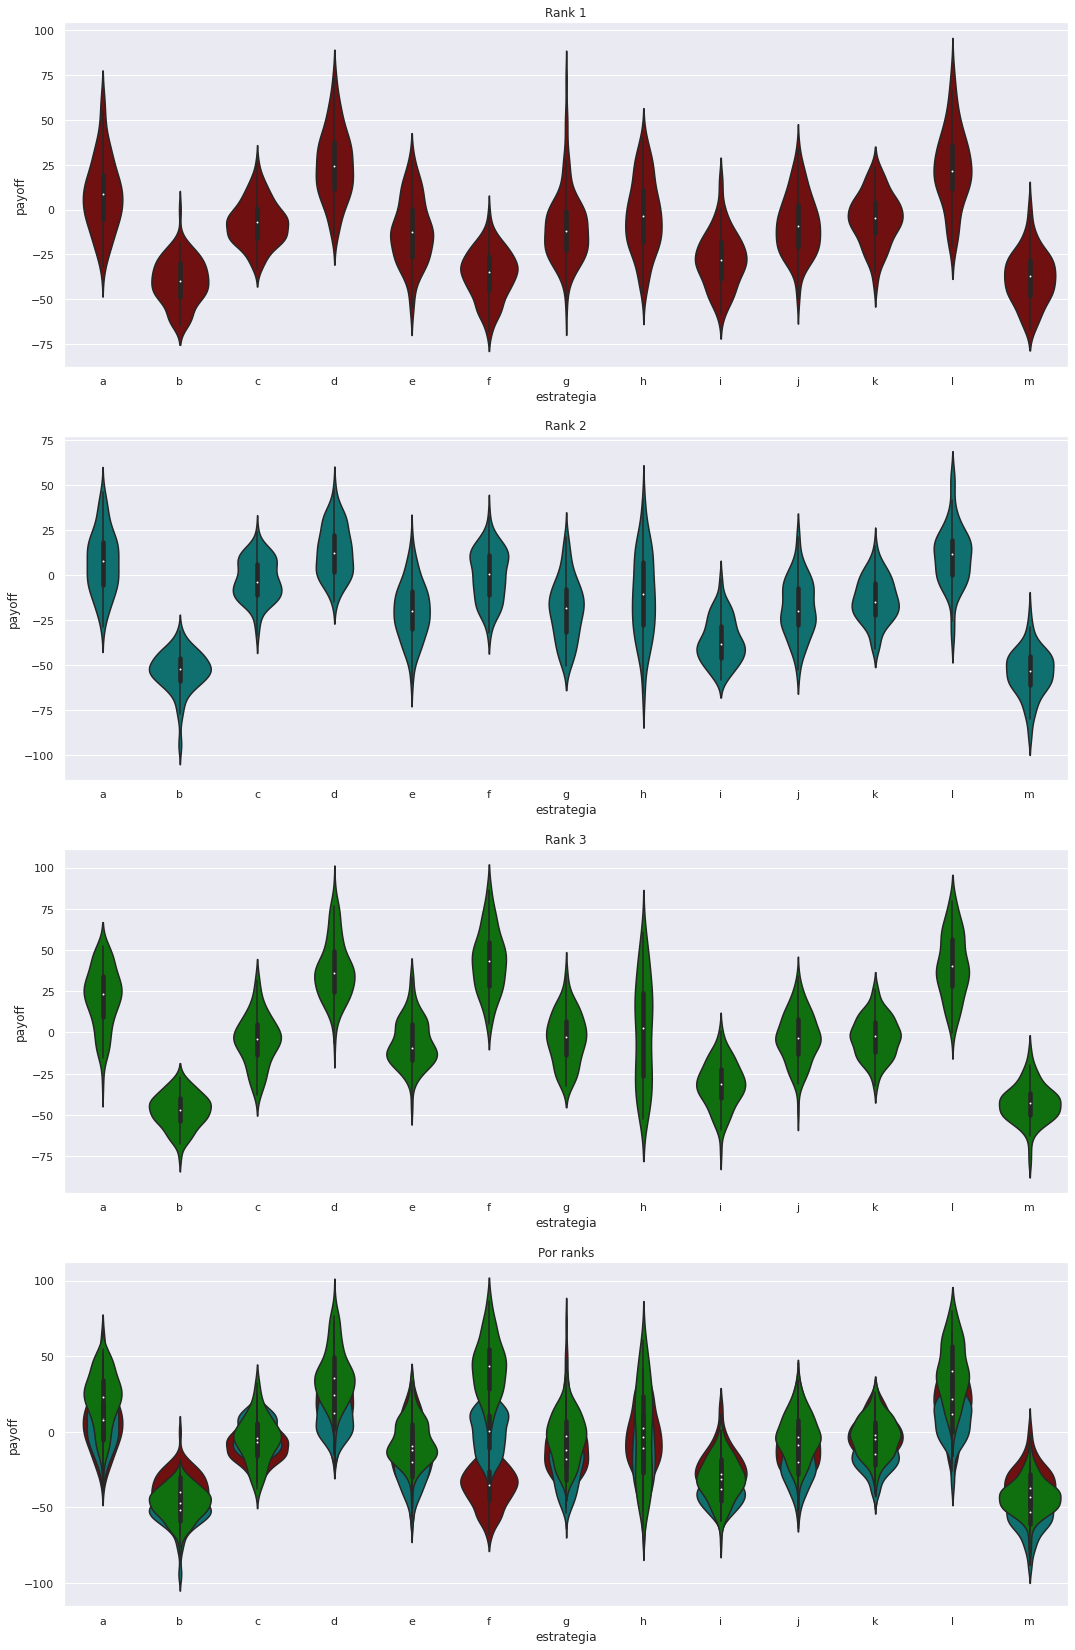

In [ ]:
fig , ax = plt.subplots(4,1,figsize=(18,16))
plt.subplots_adjust(top=1.5)

sns.color_palette("dark",as_cmap=True)
df_lista.sort_values('estrategia', inplace=True)

filtro = df_lista[df_lista['rank']==1]
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[0],color='maroon')
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[3],color='maroon')

filtro = df_lista[df_lista['rank']==2]
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[1],color='teal')
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[3],color='teal')

filtro = df_lista[df_lista['rank']==3]
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[2],color='green')
sns.violinplot(x=filtro['estrategia'], y=filtro['payoff'],ax=ax[3],color='green')

ax[0].title.set_text('Rank 1')
ax[1].title.set_text('Rank 2')
ax[2].title.set_text('Rank 3')

ax[3].title.set_text('Por ranks')

#3) Resolvendo o Jogo:

  - Analisando-se a matriz anterior, é possível observar que os EN são {L, L} e {NL, NL}. No entanto, encontrar o EN do jogo com todos os jogadores e todas as suas ações é uma tarefa de alta complexidade analítica e computacional. Assim, o presente estudo limitar-se-á a comparar as estratégias com os melhores e piores desempenhos nas simulações computacionais, buscando revelar quais seriam as estratégias racionais para o jogo. Dentre elas, destacam-se:        
  - Melhores estratégias:      
    - a) dá like em todos que tiverem rank >= minimo enquanto ainda houverem likes;
    - d) dá like em todos que tiverem rank == 3 enquanto ainda houverem likes; 
    - l) dá like em todas as pessoas com o rank maior ou igual ao maior rank. em quem ela já deu like.
  - Piores estratégias:
    - b) dá like em todos que tiverem rank == 1 enquanto ainda houverem likes;
    - m) dá like em todas as pessoas com o rank menor ou igual ao menor rank em quem ela já deu like;
- Observando-se o método de decisão das estratégias citadas, pode-se concluir que dar like em pessoas de rank mais alto é mais benéfico relativamente a dar like em pessoas com rank menor. Isso faz com que a "estratégia racional" seja dar like majoritariamente em pessoas de rank alto. Assim, o resultado do simulador refleta a infeliz realidade, na qual pessoas com características mais desejáveis recebem a maioria dos likes e as com qualidades menos desejáveis são menos cobiçadas. Tal desigualde gera sofrimento e angústia para aquelas que não são consideradas como boas o suficiente pelo padrão social e mantém desigualdades estruturais da sociedade.

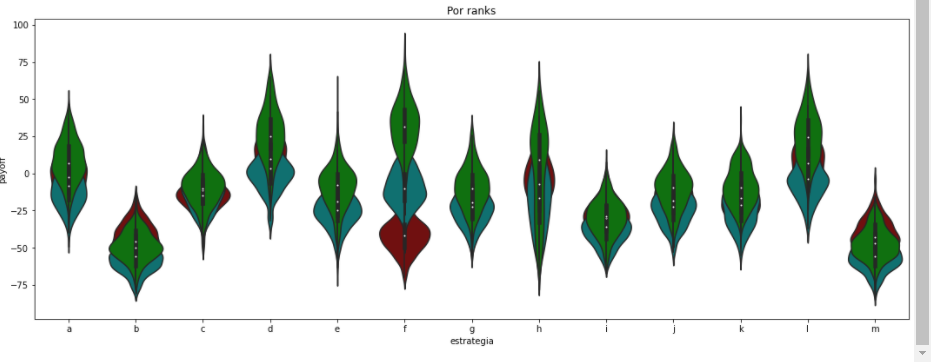

## Planejador central


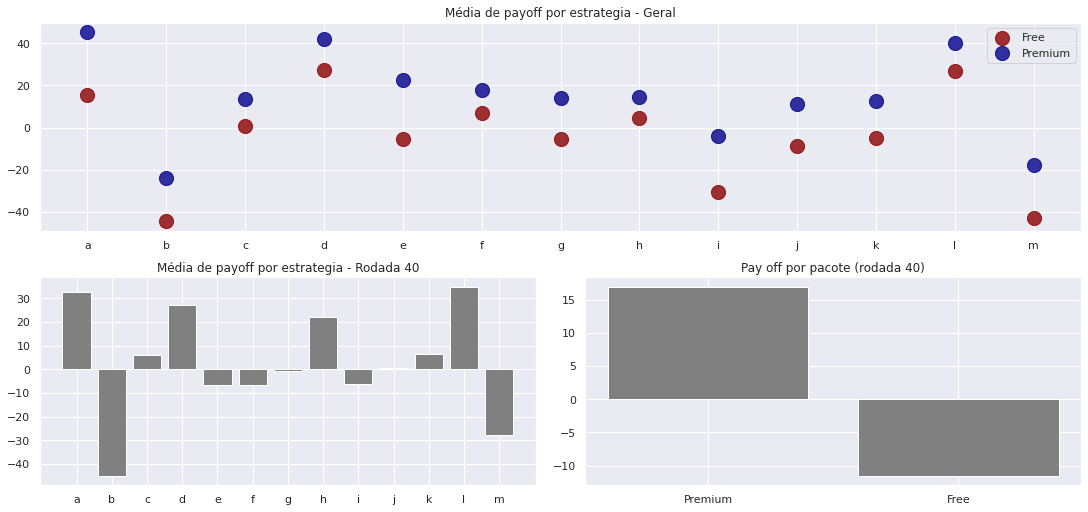

In [ ]:
# Simulação com a introdução de planejador central

simulador1 = Simulador()

# determina parâmetros a serem utilizados no simulador
lista_estrategias = ['a', 'b', 'c','d', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']
lista_pesos = [1 for letra in lista_estrategias]
pop = 100
estoque = 40


# cria jogadores de acordo com os parâmetros
simulador1.cria_pessoas(lista_estrategias, lista_pesos, pop, estoque)

#cria simulações

rodada = 0
lista_tuplas_geral=[]
pacotes =[True,False]
while True:
  lista_pesos = [1 for letra in lista_estrategias]
  rodada +=1
  simulador1.del_pessoas()
  simulador1.cria_pessoas(lista_estrategias, lista_pesos, pop, estoque,premium_prop=0.5)
  simulador1.rodada()

  populacao = simulador1.pessoas
  lista_tuplas = [(pessoa.estrategia , pessoa.calcula_payoff(),pessoa.rank,pessoa.premium) for pessoa in populacao]
  lista_tuplas_geral += lista_tuplas


  ##Calculando pay off médio na rodada
  payoff_medio = []
  for estrategia in lista_estrategias:
    somador =0
    contador=0
    for pessoa in lista_tuplas:
      if pessoa[0] == estrategia:
        contador+=1
        somador+=pessoa[1]
    if contador==0:
      payoff_medio.append(0)
    else:
      payoff_medio.append(somador/contador)


  ##Calculando pay off médio geral
  payoff_medio_geral_f=[]
  payoff_medio_geral_p=[]
  for estrategia in lista_estrategias:
    somador_f =0
    contador_f=0
    somador_p =0
    contador_p=0

    for pessoa in lista_tuplas_geral:
      if pessoa[0] == estrategia and pessoa[3]==False:
        contador_f+=1
        somador_f+=pessoa[1]

      elif pessoa[0] == estrategia:
        contador_p+=1
        somador_p+=pessoa[1]

    if contador_f ==0 :
      payoff_medio_geral_f.append(0)
    else:
      payoff_medio_geral_f.append(somador_f/contador_f)

    if contador_p ==0 :
      payoff_medio_geral_p.append(0)
    else:
      payoff_medio_geral_p.append(somador_p/contador_p)
  

  ## Calcula payoff por pacote
  premium_medio=[]
  for pacote in pacotes:
    somador =0
    contador=0
    for pessoa in lista_tuplas:
      if pessoa[3] == pacote:
        contador+=1
        somador+=pessoa[1]
    if contador ==0:
      premium_medio.append(0)
    else:
      premium_medio.append(somador/contador)


  figura = plt.figure(figsize=(15,7), constrained_layout=True)
  gs = figura.add_gridspec(2, 2)


  ## gráfico lolipop
  ax = plt.subplot(gs[0, :]) # row 0, col 0
  ax.title.set_text('Média de payoff por estrategia - Geral')

  my_range = range(len(lista_estrategias))
  ax.scatter(my_range,payoff_medio_geral_f,  color='darkred', alpha=.8, label='Free' , marker="o",s=200)
  ax.scatter( my_range,payoff_medio_geral_p, color='darkblue', alpha=.8, label='Premium',marker="o",s=200)
  ax.legend()
  plt.xticks(my_range, lista_estrategias)


  ## payoff_medio_geral_f
  ax = plt.subplot(gs[1, 0]) # row 0, col 1
  ax.title.set_text(f'Média de payoff por estrategia - Rodada {rodada}')
  plt.bar(lista_estrategias,payoff_medio,color='gray')

  ax = plt.subplot(gs[1, 1]) # row 1, span all columns
  ax.title.set_text(f'Pay off por pacote (rodada {rodada})')
  plt.bar(['Premium','Free'],premium_medio,color='gray')


  output.clear(wait=True)
  plt.show()
  if rodada==40:
    break

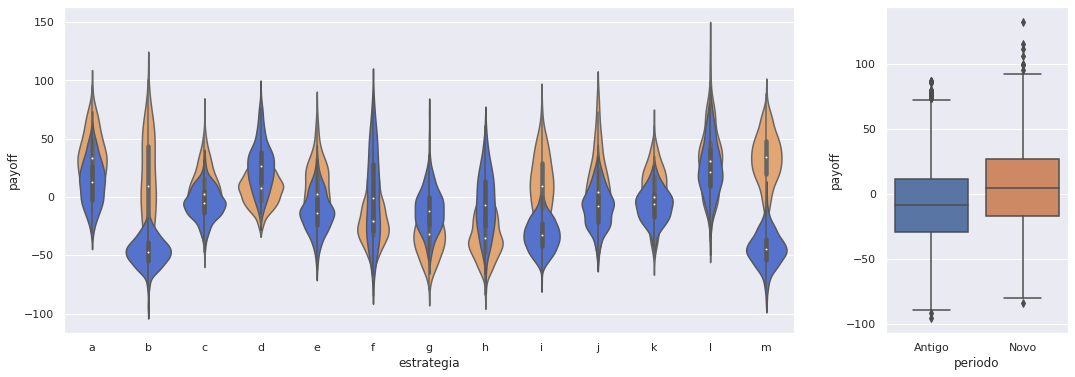

In [ ]:
# Gráfico de payoff dos jogadores 
# Comparação pré X pós introdução do planejador central

df_lista1 = pd.DataFrame(lista_tuplas_geral)
df_lista1.columns = ['estrategia', 'payoff', 'rank','premium']
distribuicao1 = df_lista['payoff'].to_list()
periodo=len(distribuicao1)*['Antigo']
distribuicao2 = df_lista1['payoff'].to_list()
periodo+=len(distribuicao2)*['Novo']

df_comparativo = pd.DataFrame({'payoff':distribuicao1+distribuicao2,'periodo':periodo})

fig = plt.figure(figsize=(18, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax = plt.subplot(gs[ 0])
sns.violinplot(x=df_lista1['estrategia'], y=df_lista1['payoff'],ax=ax,color='sandybrown', labels='Novo')
sns.violinplot(x=df_lista['estrategia'], y=df_lista['payoff'],ax=ax,color='royalblue', labels='Antigo')

ax = plt.subplot(gs[ 1])

sns.boxplot(x=df_comparativo['periodo'] , y=df_comparativo['payoff'])

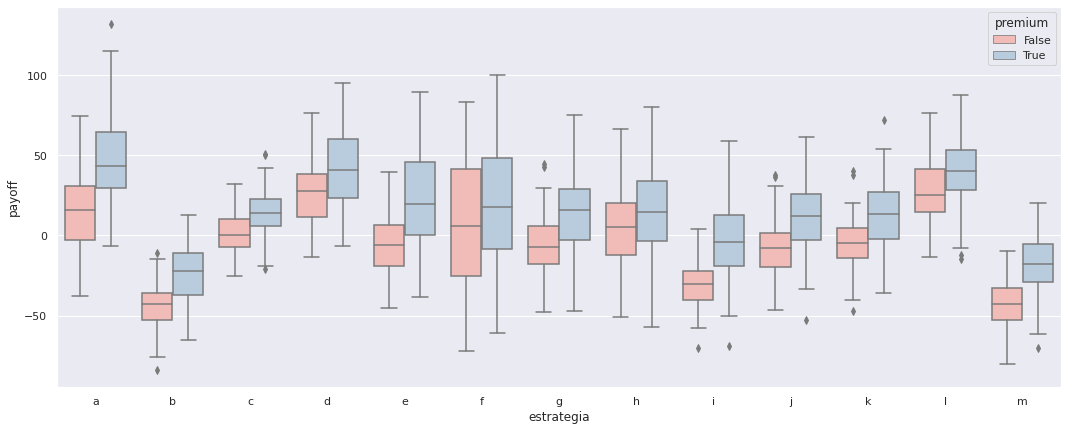

In [ ]:
# Gráfico de payoff dos jogadores 
# Comparação de jogadores free X premium

df_lista1.sort_values('estrategia',inplace=True)

sns.set(style="darkgrid")

plt.figure(figsize=(18,7))

sns.boxplot(x="estrategia", y="payoff", hue="premium", data=df_lista1, palette="Pastel1")
plt.show()

In [ ]:
# deleta variáveis utilizadas na última versão do simulador
# assim, um novo simulador pode ser criado

del(simulador)
del(lista_pesos)
del(pop)
del(estoque)
del(lista_estrategias)

#4) Avaliação do Jogo

- Dados os resultados da primeira simulação,inserimos um Planejador Central que distribui pacotes premium para alguns jogadores, pacote este que permite que eles vejam quem não os deu like até aquele momento. Desse modo, metade dos jogadores recebeu acesso a esse pacote.  
- Ao inserirmos o planejador central notamos que aqueles que possuíam pacotes premium performaram melhor, mendo entre indivíduos de mesmas estratégias. Além disso, o payoff médio do jogo aumentou, ou seja, na média os jogadores estão melhores do que antes.

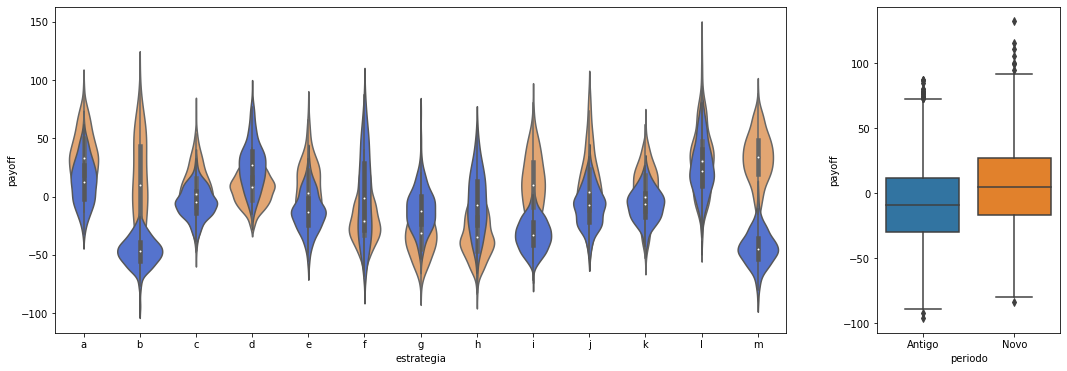

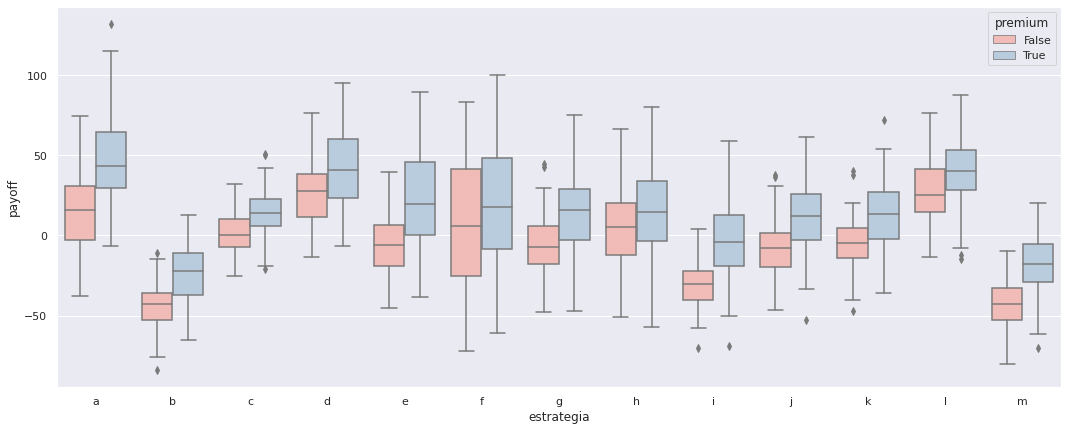

# 5) Conclusão

Depois de todas essas análises e simulações computacionais chegamos a conclusões como:
  - Os resultados nos mostram que indivíduos mais bem ranqueados performam melhor. Tal resultado pode ser visto na realidade,pois, na prática, pessoas mais atrantes ou mais desejadas acabam "monopolizando" a atenção das outras.
  - A estratégia racional é dar like em pessoas interessantes. Isso ocorre porque matchs com pessoas diferentes não possuem a mesma valoração para o indivíduo, assim, mesmo que a chance de um match com alguem de rank alto seja baixa, o benefício compensa a menor chance.
  - Indivíduos com mais informação decidem melhor. Nota-se que isso ocorre pelo fato de que, ao receber o pacote premium, usuários deciram melhor e tiveram um pay-off maior do que aqueles com acesso a uma menor informação. Tal cenário ilustra bem os resultados vistos na teoria microeconômica de que ao termos uma relação onde uma das partes possui mais informação que a outra, a primeira sairá melhor dessa situação.   
